In [1]:
import pandas
import random

In [2]:
df = pandas.DataFrame()

In [3]:
# Generate some random data, 100 rows x 2 columns
types = ['rent', 'acquisition', 'bill']
df['label'] = [random.choice(types) for i in range(100)]
df['amount'] = [random.randint(20, 50) for i in range(100)]
df.head()
# They first column below with 0,1,2,3 etc is just keeping track of the row index (or row number)

,label,amount
0,bill,46
1,acquisition,27
2,rent,49
3,rent,42
4,acquisition,40


In [4]:
# Some basic stats!
df.amount.min(), df.amount.max()

(20, 50)

In [5]:
df.amount.mean() # this should trend towards 35 with larger sample sizes

34.47

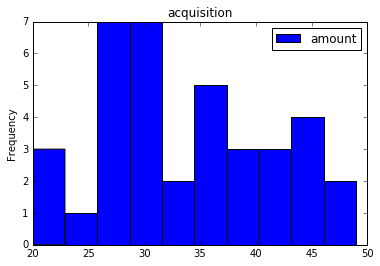

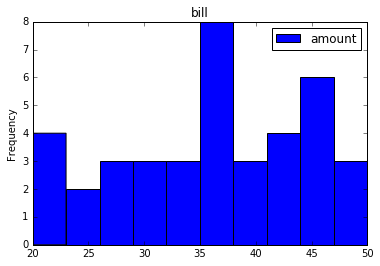

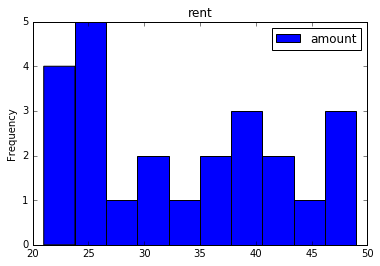

In [6]:
%matplotlib inline
# Plot example!
# histogram of amount totals broken down by type of spending
for label, group in df.groupby('label'):
    group.plot(kind='hist', title=str(label))


In [7]:
# Okay, so say we wanted every combination of rent + bill that added up to 70.
bills = df[df.label == 'bill']
len(bills)

39

In [8]:
rents = df[df.label == 'rent']
len(rents)

24

In [9]:
results = []
# In order to do this, we'll iterate through every 'bill' and then every 'rent' and see if they add up to 70
# if they do, store the indices in the results list
for index1, row1 in bills.iterrows():
    for index2, row2 in rents.iterrows():
        if row1.amount + row2.amount == 70:
            results.append([index1, index2])
len(results)

28

In [10]:
results[0] 

[0, 6]

In [11]:
df.iloc[results[0]] 

,label,amount
0,bill,46
6,rent,24


In [12]:
df.iloc[results[1]]

,label,amount
0,bill,46
65,rent,24


In [13]:
# Or say we wanted every possible combination of rows that added up to 150?
import itertools
